In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df["job_skills"].apply(lambda Skill_list: ast.literal_eval(Skill_list) if pd.notna(Skill_list) else Skill_list)

In [2]:
import seaborn as sns

In [3]:
df_us = df[(df['job_title_short']== "Data Analyst") & (df['job_country']=="United States")].copy()
df_us = df_us.dropna(subset=['salary_year_avg']) #to plot  dropna value
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [18]:
df_us =df_us.explode("job_skills")
df_us_group= df_us.groupby("job_skills").agg(
    count = ("job_skills","count"),
    avg_salary = ("salary_year_avg","median")
) # we can also do .groupby("job_skills")["salary_year_avg"].agg(["count","median"])
df_top_pay = df_us_group.sort_values(by="avg_salary", ascending=False).head(10)
df_top_skills =  df_us_group.sort_values(by="count", ascending=False).head(10).sort_values(by="avg_salary", ascending=False).head(10)




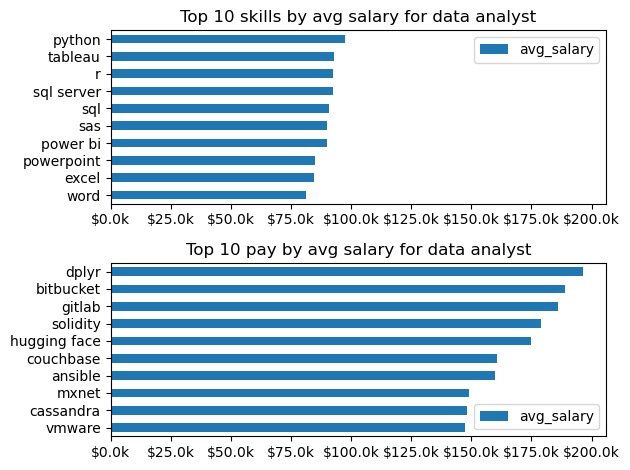

In [19]:
fig,ax=plt.subplots(2,1)
df_top_skills[::-1].plot(kind="barh",y="avg_salary",ax=ax[0],title="Top 10 skills by avg salary for data analyst")
df_top_pay[::-1].plot(kind="barh",y="avg_salary", ax=ax[1],title="Top 10 pay by avg salary for data analyst")
ax[0].set_xlim(ax[1].get_xlim())
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f"${x/1000}k")) # Format x-axis labels as $Xks
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f"${x/1000}k"))
fig.tight_layout()


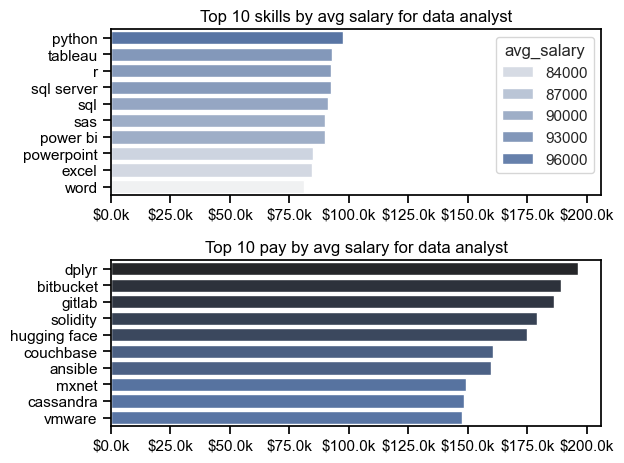

In [41]:
fig , ax = plt.subplots(2,1)
sns.set_theme(style="ticks")
sns.barplot(data=df_top_skills,x="avg_salary",y=df_top_skills.index,ax=ax[0],hue="avg_salary",palette="light:b")
sns.barplot(data=df_top_pay,x="avg_salary",y=df_top_pay.index,ax=ax[1],hue="avg_salary",palette="dark:b_r")
ax[0].set_title("Top 10 skills by avg salary for data analyst")
ax[1].set_title("Top 10 pay by avg salary for data analyst")
ax[1].legend().remove()
ax[0].set_xlim(ax[1].get_xlim())
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f"${x/1000}k")) # Format x-axis labels as $Xks
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f"${x/1000}k"))
fig.tight_layout()


histogram using seaborn

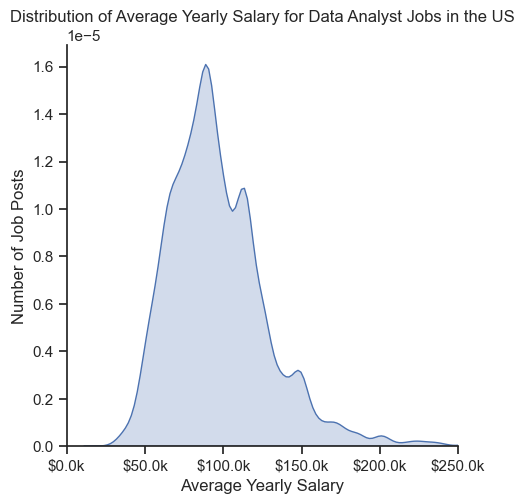

In [45]:
sns.displot(df_us["salary_year_avg"],kind='kde',fill=True)
plt.xlim(0,250000)
plt.xlabel('Average Yearly Salary')
plt.ylabel('Number of Job Posts')
plt.title('Distribution of Average Yearly Salary for Data Analyst Jobs in the US')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f"${x/1000}k")) # Format y-axis labels as $Xks


In [ ]:
#done